<h1>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h1>
<h3><b>Παπαγεωργίου-Τσακανίκα Βασιλική, ΑΜ: 03116673</b></h3>
<h3>Γενετικοί Αλγόριθμοι</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy.integrate import odeint

### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

<p style=text-align:justify>Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.</p>

In [2]:
from numpy import sum, zeros, reshape, arange
import random

def create_population(m=10, n=20):
    # Create the initial population
    return np.random.randint(2, size=(m,n))

def find_fitness(i, seq):
    # Calculate fitness of chromosomes
    return sum(seq[i])

def proportional_selection(seq, elitism):
    # Select chromosomes to pass to next population proportionally to their fitness
    m = seq.shape[0]
    n = seq.shape[1]
    child_sequence = zeros((m,n))  # ομοιο με το seq σε πίνακας με μηδενικά 

    fitness = [] # Το κρατάμε για κάθε chromosomes (m) 

    # Βρήσκουμε το συνολικό fitness του πληθυσμού sum_fitness    
    for i in range(m):
        fitness.append(find_fitness(i, seq))  # i η γραμμη στον πινακα seq 
    sum_fitness = sum(fitness)
    
    # Ελιτισμός: οι καλύτερες λύσεις περνάνε σίγουρα στην επόμενη γενιά
    x_indexes = argsort(fitness)[::-1][0:elitism]  
    child_sequence[0:elitism] = seq[x_indexes]
    
    # Roulette
    for i in range(elitism, m):
        randUniform = random.uniform(0,1) # κανονική κατανομή για την επιλογή [0,1]
        k = 0
        summ = fitness[k] / sum_fitness
        while(k < m - 1 and randUniform > summ): 
            k += 1 
            summ += fitness[k] / sum_fitness 

        child_sequence[i,:] = reshape(seq[k,:], (1,n))  # το φέρνουμε στην αρχική μορφή του seq 
        
    return child_sequence 

def crossover(Pc, child_sequence):
    # Apply crossover to population
    m = child_sequence.shape[0]
    n = child_sequence.shape[1]
    
    i = 0
    while (i < m - 1):
        if (random.uniform(0, 1)) <= Pc:
            pos = np.random.randint(n-1)
            
            k = pos + 1
            while (k < n):
                aux = child_sequence[i][k]
                child_sequence[i][k] = child_sequence[i+1][k]
                child_sequence[i+1][k] = aux
                
                k += 1
            
        i += 2
    
    return child_sequence


def mutation(Pm, child_sequence):
    # Apply mutation to population
    m = child_sequence.shape[0]
    n = child_sequence.shape[1]
    
    for i in range(m):
        for k in range(n):
            if (random.uniform(0, 1)) < Pm:
                child_sequence[i][k] = (child_sequence[i][k] + 1) % 2  # το συμπλήρωμα ως προς 1  
    
    return child_sequence


def genetic_algorithm(Pm, Pc, m, elitism, n=20, T=30):
    # Genetic algorithm
    child_sequence = create_population(m,n)
    for t in range(T):
        child_sequence = proportional_selection(child_sequence, elitism)
        child_sequence = crossover(Pc, child_sequence)
        child_sequence = mutation(Pm, child_sequence)
    
    return child_sequence

In [ ]:
# Τρέχουμε τον γενετικό αλγόριθμο με τις ζητούμενες υπερπαραμέτρους 
# και επιλέγουμε εκείνους τους συνδυασμούς που δίνουν το καλύτερο fitness.

from numpy import max, argsort

# main
max_fit = []
params = []
for m in range(10, 110, 10):
    for pc in arange(0.3, 1, 0.1):
        for pm in arange(0.01, 0.21, 0.01):
            for elitism in range(0, 3):
                seq = genetic_algorithm(pm, pc, m, elitism, n=20, T=30)
                fitness = [find_fitness(i, seq) for i in range(m)]
                max_fit.append(max(fitness))
                params.append("m={}, Pc={}, Pm={}, elitism={}, fitness=".format(m, round(pc,3), 
                                                                                 round(pm,2), elitism))
            
indexes = argsort(max_fit)[::-1]
sort = sorted(max_fit)[::-1]
for i, fit in enumerate(sort):
    print(params[indexes[i]] + str(fit))
print()
print("Max fitness: ", max(max_fit))

m=70, Pc=0.9, Pm=0.02, elitism=2, fitness=20.0
m=30, Pc=0.4, Pm=0.02, elitism=2, fitness=20.0
m=70, Pc=0.7, Pm=0.02, elitism=2, fitness=20.0
m=70, Pc=0.7, Pm=0.02, elitism=1, fitness=20.0
m=70, Pc=0.7, Pm=0.01, elitism=2, fitness=20.0
m=70, Pc=0.7, Pm=0.01, elitism=1, fitness=20.0
m=70, Pc=0.7, Pm=0.01, elitism=0, fitness=20.0
m=30, Pc=0.4, Pm=0.01, elitism=2, fitness=20.0
m=70, Pc=0.6, Pm=0.02, elitism=2, fitness=20.0
m=70, Pc=0.6, Pm=0.01, elitism=2, fitness=20.0
m=70, Pc=0.6, Pm=0.01, elitism=1, fitness=20.0
m=30, Pc=0.4, Pm=0.03, elitism=2, fitness=20.0
m=100, Pc=0.5, Pm=0.01, elitism=0, fitness=20.0
m=70, Pc=0.5, Pm=0.04, elitism=2, fitness=20.0
m=70, Pc=0.5, Pm=0.03, elitism=1, fitness=20.0
m=70, Pc=0.5, Pm=0.02, elitism=2, fitness=20.0
m=70, Pc=0.5, Pm=0.01, elitism=2, fitness=20.0
m=70, Pc=0.5, Pm=0.01, elitism=1, fitness=20.0
m=70, Pc=0.5, Pm=0.01, elitism=0, fitness=20.0
m=10, Pc=0.6, Pm=0.03, elitism=2, fitness=20.0
m=30, Pc=0.5, Pm=0.01, elitism=2, fitness=20.0
m=30, Pc=0.5

### <b> Σχόλια: </b>
Παρατηρούμε ότι: $ Max fitness = 20 $. Είναι αναμενόμενο καθώς fitness αποτελεί το άθροισμα των ψηφίων των χρωμοσωμάτων.

Σχολιασμός παραμέτρων: 
* Ο πληθυσμός: Όσο μεγαλύτερος είναι ο πληθυσμός που μελετάμε τόσο μεγαλύτερη είναι και η ποικιλομορφία που συναντάτε σε αυτόν. Ετσι παρατηρήσαμε και από τα πειραματικά δεδομένα, πως ευνοούν το fitness τιμές πληθυσμού μεγαλύτερες του 80. 
* Η πιθανότητα μετάλλαξης: Η μεταλλάξεις προσδίδουν μία τυχαιότητα στην εξέλιξη του πληθυσμού μας. Βοηθά την συνάρτηση βελτιστοποίησης μας να ξεκολλάει από τα τοπικά μέγιστα, προς αναζήτηση του ολικού. 
Ωστόσο σε μεγάλες τιμες <b>Pm</b> χαλάει την σύγκλιση καθώς έχει απρόβλεπτη συμπεριφορά. 
* Η πιθανότητα διασταύρωσης: Με αυτήν έχουμε σαν στόχο την διασταύρωση πληθυσμών με μεγάλα fitness για την διαιώνιση αυτών των καλώς σκορ και βελτίωση του fitness του συνολικού πληθυσμού, αυτός είναι και ο λόγος που θα προτιμούσα μεγάλες τιμές στο <b>Pc</b>.


<b>Στην περίπτωση του ελιτισμού,</b> παρατηρούμε πως για τα μεγαλύτερα σκορ, οι τιμές αυτού που προτιμούνται είναι συνήθως οι μεγαλύτερες, με αποτέλεσμα να φτάνουμε στο συμπέρασμα πως η αύξηση του τείνει να ευνοεί την αύξηση του fitness και μάλιστα άσχετα με τις τιμές των άλλων παραμέτρων. 

<b>Στην περίπτωση χωρίς ελιτισμό,</b> οι τιμές που προτιμούνται για το $P_m$ τείνουν να είναι από 0.01 εώς 0.03, ενώ για το $P_c$ από 0.6 εώς 0.9. Με σταθερές τις παραπάνω τιμές και αυξομειώσεις στον πληθυσμό παρατηρούμε τα μέγιστα σκόρ στο fitness να έρχονται από μεγάλους πληθυσμούς της τάξης των 70-90.







### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

<p style=text-align:justify>Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.</p>

##### Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)
<p style=text-align:justify>Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.</p>

##### Αρχικοποίηση
<p style=text-align:justify>Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.</p>

##### Συνάρτηση Fitness
<p style=text-align:justify>Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.</p>

##### Επιλογή (Selection)
<p style=text-align:justify>Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό, δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.</p>

##### Διασταύρωση (Crossover)
<p style=text-align:justify>Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.</p>

##### Μετάλλαξη (Mutation)
<p style=text-align:justify>Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.</p>

##### Κριτήριο Τερματισμού (Stopping Criterion)
<p style=text-align:justify>Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.</p>

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

<p style=text-align:justify>Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.</p>


In [4]:
### ATTENTION: don't change because the variables are used in the given code
### the use of the converted graph is optional

# Import real topologies 

football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [5]:
from numpy import mean, argsort, zeros, reshape, squeeze, asarray
import numpy as np
import random

def create_population(G, m=300):  #G: graph
    # Create the initial population
    n = len(list(G.nodes()))
    chrom = zeros((m,n))   # αρχικοποιούμε πρώτα με μηδενικά τον πίνακα

    neighbors = []  #θα κρατήσουμε τους γείτονες του κάθε κόμβου
    for i in range(n):
        neighbors.append(list(G.neighbors(i)))
    for i in range(m):
        for j in range(n):
            chrom[i][j] = np.random.choice(neighbors[j], 1)[0]
    # επιλέξαμε τυχαία έναν από τους γείτονες για τις αρχικες τιμές των χρωμοσωμάτων
    return chrom


# στον πίνακα chrom το i-οστό χρωμόσωμα, graph: o αρχικός γράφος  
def find_fitness(chrom, idx, graph):
    # Calculate fitness of chromosomes
        
    # Initialize chromosomes graph 
    # θα περιέχει μέσα μόνο τις ακμές συνδεσης και θα αποτελεί η κάθε συνεκτική συνιστώσα μία κοινότητα 
    G = nx.Graph()
    for j in range(chrom.shape[1]):
        G.add_node(j)
    for v,u in enumerate(chrom[idx,:]):
        if G.has_edge(v,u):
            continue
        G.add_edge(v,u)
    
    # Adjacency matrix of initial graph  
    A = nx.to_numpy_matrix(graph)
    A = squeeze(asarray(A))  # numpy array
            
    # Connected components - communities of chromosomes graph
    comps = list(nx.connected_components(G))
    num_comps = len(comps)   # ο αριθμός των κοινοτήτων
    
    fitness = 0
    for comp in comps:
        ll = list(comp)
        for i,item in enumerate(ll):
            ll[i] = int(item)

        # Adjacency matrix of subgraph
        S = A[ll][:,ll]

        # rows mean values of subgraph
        a = mean(S, axis=1) 

        # M(S) = το αθροισμα, του μέσου όρου των άσσων, σε ένα υπογράφο / δια τον αριθμό των στηλών 
        # r=2   εγινε δοκιμή και με r=1 αλλά εβγαζε παρόμοια αποτελέσματα 
        I = S.shape[0]
        Ms = sum(a)*sum(a) / I
    
        # u_s 
        u_s = sum(sum(S))
    
        # Qs
        Qs = Ms * u_s
        fitness += Qs
            
    return fitness


# όπως και στην προηφούμενη ασκηση: 
def proportional_selection(chrom, x, G):    # x: το πλήθος του ελιτισμού που θα κρατήσουμε
    # Select chromosomes to pass to next population proportionally to their fitness
 
    m = chrom.shape[0]
    n = chrom.shape[1]
    new_chrom = zeros((m,n))
    
    fitness = []
    for i in range(m):
        fitness.append(find_fitness(chrom, i, G))
        
    sum_fitness = sum(fitness)
    
    # Ελιτισμός: οι καλύτερες λύσεις περνάνε σίγουρα στην επόμενη γενιά
    x_indexes = argsort(fitness)[::-1][0:x]
    new_chrom[0:x] = chrom[x_indexes]
        
    # Roulette
    for i in range(x, m):
        rand = random.uniform(0,1) # Random[0,1]
        k = 0
        summ = fitness[k] / sum_fitness
        while(k < m - 1 and rand > summ): 
            k += 1
            summ += fitness[k] / sum_fitness 

        new_chrom[i,:] = reshape(chrom[k,:], (1,n))
        
    return new_chrom 


def crossover(Pc, chrom):  #Pc: crossover probability
    # Apply crossover to population
    m = chrom.shape[0]
    n = chrom.shape[1]
    
    count = 0
    new_chrom = zeros((m,n))  # Το παιδί 
    while (count < m):  #για κάθε χρωμόσωμα
        i = 0
        while (i < m - 1):
            x = random.uniform(0, 1)
            if x <= Pc:            # αναλογα με τη δοσμένη τυχαιότητα  
                # Mask
                mask = np.random.randint(2, size=n)

                # Child
                for j in range(n):
                    if mask[j] == 0:
                        new_chrom[count][j] = chrom[i][j]

                    elif mask[j] == 1:
                        new_chrom[count][j] = chrom[i+1][j]
                 
                # Next child
                count += 1
                if count == m:   # οταν θα εχουν διασχισθεί όλα τα χρωμοσώματα  
                    return new_chrom       
            
            i += 1 
        
    
    return new_chrom



def mutation(G, Pm, new_chrom):  # Pm: mutation probability
    # Apply mutation to population
    m = new_chrom.shape[0]
    n = new_chrom.shape[1]
    
    # Εντοπίζουμε ξανά τους γείτονες
    neighbors = []
    for i in range(n):
        neighbors.append(list(G.neighbors(i)))
    
    for i in range(m):
        for k in range(n):
            if (random.uniform(0, 1)) < Pm:                               # βαση της τυχαιότητας που μας δόθηκε
                new_chrom[i][k] = np.random.choice(neighbors[k], 1)[0]    # Επιλέγουμε εκ νέου τυχαία έναν από τους γείτονες
    
    return new_chrom


def genetic_algorithm(G, Pm, Pc, m, x, T=30):
    # Genetic algorithm
    new_chrom = create_population(G, m)
    best_fit = 0
    count_fit = 0    
    for t in range(T):
        new_chrom = proportional_selection(new_chrom, x, G)
        new_chrom = crossover(Pc, new_chrom)
        new_chrom = mutation(G, Pm, new_chrom)
    
        # Stopping Criterion: Οταν δεν βελτιώνεται αλλό 
        fitness = [] 
        for idx in range(len(new_chrom)):
             fitness.append(find_fitness(new_chrom, idx, G))                
        cur_fit = max(fitness)
        if cur_fit == best_fit:
            count_fit += 1   
        if count_fit == 5:
            return new_chrom
    
    return new_chrom

In [6]:
# Run the genetic algorithm for different values of the requested parameters
from numpy import max, arange, argmax

def runGen(G):
    m = 300
    best_chrom = []
    parameters = []
    for pc in arange(0.7, 0.9, 0.1):
        for pm in arange(0.1, 0.3, 0.1):
            for x in range(1, 4):        
                chrom = genetic_algorithm(G, pm, pc, m, x, T=30)
                fitness = [find_fitness(chrom, i, G) for i in range(m)]
                best_chrom.append(chrom[argmax(fitness)])
                parameters.append("Pc={}, Pm={}, x={}, best fitness={}".format(round(pc,3), 
                                                                               round(pm,2), x, max(fitness)))
                print("Pc={}, Pm={}, x={}, best fitness={}".format(round(pc,3), round(pm,2), x, max(fitness)))                
    
    return best_chrom, parameters

In [7]:
# modularity for GA community detection algorithm 
def compute_modularity(G, best_chrom, parameters):
    modularities = []
    for i,chrom in enumerate(best_chrom):
        # Initialize chromosome graph
        GG = nx.Graph()
        for j in range(len(chrom)):
            GG.add_node(j)
        for v,u in enumerate(chrom):
            if GG.has_edge(u,v):
                continue
            GG.add_edge(v,u)

        # Connected components - communities of chromosomes graph
        comps = list(nx.connected_components(GG)) 
        communities = [list(comp) for comp in comps]
        
        # Modularity score
        modul = nx.algorithms.community.quality.modularity(G, communities)
        modularities.append(modul)
        print(parameters[i] + ", modularity={}".format(modul))
        
    best_modularity_index = argmax(modularities)
    best_modularity = modularities[best_modularity_index]
    best_params = parameters[best_modularity_index]
    print(best_params + ", best modularity={}".format(best_modularity))
    
    return best_modularity


#### Σχολιασμός αποτελεσμάτων: 
 
Οι παράμετροι που μελετάμε είναι ίδιοι με της προηγούμενης άσκησης οπότε περιμένουμε πάλι οι βέλτιστη λύση να έχει μεγάλο ελιτισμό, μικρή πιθανότητα μετάλλαξης και ικανοποιητική πιθανότητα διασταύρωσης. 
 
Παρατηρώντας προσεκτικά τα παρακάτω αποτελέσματα είδαμε πως βέλτιστο σκορ δίνει για: 
* crossover probability = 0.1 εως 0.2
* mutation probability = 0.8 εως 0.9
* elitism = 2 εως 3

In [ ]:
print ("football")
football_chrom, football_param = runGen(football)
print ("lesmis")
lesmis_chrom, lesmis_param = runGen(lesmis)
print ("dolphin")
dolphins_chrom, dolphins_param = runGen(dolphins)

football
Pc=0.7, Pm=0.1, x=1, best fitness=1975.6526715049138
Pc=0.7, Pm=0.1, x=2, best fitness=1729.1341876283707
Pc=0.7, Pm=0.1, x=3, best fitness=2071.50339962572
Pc=0.7, Pm=0.2, x=1, best fitness=2147.762961591221
Pc=0.7, Pm=0.2, x=2, best fitness=1727.2437335695554
Pc=0.7, Pm=0.2, x=3, best fitness=1882.2024286751894
Pc=0.8, Pm=0.1, x=1, best fitness=1755.3937778025966
Pc=0.8, Pm=0.1, x=2, best fitness=2135.3106655948677
Pc=0.8, Pm=0.1, x=3, best fitness=2596.244205213935
Pc=0.8, Pm=0.2, x=1, best fitness=1788.0449608478905
Pc=0.8, Pm=0.2, x=2, best fitness=1933.3999119745013
Pc=0.8, Pm=0.2, x=3, best fitness=1814.435107572189
Pc=0.9, Pm=0.1, x=1, best fitness=2155.2242152999575
Pc=0.9, Pm=0.1, x=2, best fitness=1814.794294922405
Pc=0.9, Pm=0.1, x=3, best fitness=2091.500019973116
Pc=0.9, Pm=0.2, x=1, best fitness=1820.1325407433465
Pc=0.9, Pm=0.2, x=2, best fitness=1581.0402425151315
Pc=0.9, Pm=0.2, x=3, best fitness=1783.6011837615922
lesmis
Pc=0.7, Pm=0.1, x=1, best fitness=143

In [ ]:
print("football")
foot_modul = compute_modularity(football, football_chrom, football_param)
print("lesmis")
lesmis_modul = compute_modularity(lesmis, lesmis_chrom, lesmis_param)
print("dolphin")
dolphin_modul = compute_modularity(dolphins, dolphins_chrom, dolphins_param)

football
Pc=0.7, Pm=0.1, x=1, best fitness=1975.6526715049138, modularity=0.36472673371140246
Pc=0.7, Pm=0.1, x=2, best fitness=1729.1341876283707, modularity=0.4094763005995705
Pc=0.7, Pm=0.1, x=3, best fitness=2071.50339962572, modularity=0.4338649542671162
Pc=0.7, Pm=0.2, x=1, best fitness=2147.762961591221, modularity=0.43761326772565057
Pc=0.7, Pm=0.2, x=2, best fitness=1727.2437335695554, modularity=0.4006424159523537
Pc=0.7, Pm=0.2, x=3, best fitness=1882.2024286751894, modularity=0.27329157008694166
Pc=0.8, Pm=0.1, x=1, best fitness=1755.3937778025966, modularity=0.3311063445893621
Pc=0.8, Pm=0.1, x=2, best fitness=2135.3106655948677, modularity=0.40766933940798744
Pc=0.8, Pm=0.1, x=3, best fitness=2596.244205213935, modularity=0.4917755323084129
Pc=0.8, Pm=0.2, x=1, best fitness=1788.0449608478905, modularity=0.4283283080828914
Pc=0.8, Pm=0.2, x=2, best fitness=1933.3999119745013, modularity=0.4098741514068483
Pc=0.8, Pm=0.2, x=3, best fitness=1814.435107572189, modularity=0.4

### Find the best partition with Girvan-Newman, Spectral Clustering and Modularity Maximization
<p style=text-align:justify>Aποτέλεσματα των αλγορίθμων της δεύτερης εργαστηριακής άσκησης (με προτεινόμενη υλοποίηση).</p>

In [ ]:
import itertools

# Girvan_newman:partitions of at most k communities, select the one with the highest value of modularity.
def comd_GN(G,k):
    gn_G = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, gn_G)
    per_G = []
    com_G = []
    for communities in limited:
        per = nx.algorithms.community.quality.modularity(G,communities)
        per_G.append(per) #list of performance of each partition
        com_G.append(communities) # list of partitions
    max_mod_G = max(per_G) # maximum modularity value
    index_G = per_G.index(max(per_G)) # index of maximum modularity
    best_G = com_G[index_G] # the partition of maximum modularity  
    num_best_G = len(best_G)
    return best_G, max_mod_G, num_best_G

GN_best_football, GN_mod_football, GN_num_football = comd_GN(football,50)
GN_best_lesmis, GN_mod_lesmis, GN_num_lesmis = comd_GN(lesmis,50)
GN_best_dolphins, GN_mod_dolphins, GN_num_dolphins = comd_GN(dolphins,50)

In [ ]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
def comd_SP(G,k):
    mG = np.array(nx.to_numpy_matrix(G))
    clustering = SpectralClustering(n_clusters=k,random_state=0, affinity='precomputed').fit(mG)
    clabels = clustering.labels_
    numc = clustering.n_clusters
    b = dict(enumerate(clabels,0)) # create a mapping of nodes indices to the community it belongs
    d = [] # a list of all communities (each list is a community)
    for i in range(0,numc):
        d.append([k for k,v in b.items() if float(v) == i])
    per = nx.algorithms.community.quality.modularity(G,d)
    return d, per, numc

def find_best_SP_partition(G,k):
    com = []
    com_mod = []
    com_num = []
    for i in range(2,k):
        tcom,tcom_mod,tcom_num = comd_SP(G,i)
        com.append(tcom)
        com_mod.append(tcom_mod)
        com_num.append(tcom_num)
    index = com_mod.index(max(com_mod))
    G_SP = com[index]
    G_SP_mod = com_mod[index]
    G_SP_num = com_num[index]
    return G_SP, G_SP_mod, G_SP_num

football_SP, football_SP_mod, football_SP_num = find_best_SP_partition(football,50) 
lesmis_SP, lesmis_SP_mod, lesmis_SP_num = find_best_SP_partition(lesmis,50)  
dolphins_SP, dolphins_SP_mod, dolphins_SP_num = find_best_SP_partition(dolphins,50)

In [ ]:
# Modularity Maximization
def comd_MM(G):
    c = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    mm_G = []
    for i,j in enumerate(c):
        a = list(j)
        mm_G.append(a)
    per = nx.algorithms.community.quality.modularity(G,mm_G)
    num_G = len(mm_G)
    return mm_G, per,num_G

football_MM, football_MM_mod, football_MM_num = comd_MM(football)
lesmis_MM, lesmis_MM_mod, lesmis_MM_num = comd_MM(lesmis)  
dolphins_MM, dolphins_MM_mod, dolphins_MM_num = comd_MM(dolphins)

### Compare best modularity scores for all algorithms

In [ ]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_football, GN_mod_football))
print ("Spectral Clustering: %r communities with modularity score %r" %(football_SP_num, football_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(football_MM_num, football_MM_mod))
print ("Genetic Algorithm: with modularity score %r" %(foot_modul))
print()
print ("Les Miserables")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_lesmis, GN_mod_lesmis))
print ("Spectral Clustering: %r communities with modularity score %r" %(lesmis_SP_num, lesmis_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(lesmis_MM_num, lesmis_MM_mod))
print ("Genetic Algorithm: with modularity score %r"%(lesmis_modul))
print()
print ("Dolphins")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_dolphins, GN_mod_dolphins))
print ("Spectral Clustering: %r communities with modularity score %r" %(dolphins_SP_num, dolphins_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(dolphins_MM_num, dolphins_MM_mod))
print ("Genetic Algorithm: with modularity score %r" %(dolphin_modul))

American College Football
Girvan-Newman: 10 communities with modularity score 0.5996290274077957
Spectral Clustering: 11 communities with modularity score 0.6022010863056824
Modularity Maximization: 6 communities with modularity score 0.5497406651426807
Genetic Algorithm: with modularity score 0.4917755323084129

Les Miserables
Girvan-Newman: 11 communities with modularity score 0.5380680761361523
Spectral Clustering: 7 communities with modularity score 0.5382230764461529
Modularity Maximization: 5 communities with modularity score 0.5005967511935024
Genetic Algorithm: with modularity score 0.530496310992622

Dolphins
Girvan-Newman: 5 communities with modularity score 0.5193821446936434
Spectral Clustering: 6 communities with modularity score 0.49497646453858624
Modularity Maximization: 4 communities with modularity score 0.4954906847039278
Genetic Algorithm: with modularity score 0.48748071674379967


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους

Παραπάνω μελετάμε γενετικους αλγόριθμους για την εύρεση κοινοτήτων σε δοσμένους γράφους. 
Τα αποτελέσματα που εξάγουμε βασίζονται στην μετρική modularity. 
Τα σκορ του γενετικού αλγορίθμου είναι πολύ κοντά στα σκορ των υπόλοιπων τεχνικών(Girvan-Newman,Spectral Clustering, Modularity Maximization). 
Ο αλγόριθμος που υλοποιήσαμε επιστρέφει και στους 3 δοκιμαστικούς γράφους σκορ κοντά στο 50%, κάτι που τον καθιστά ιδιαίτερα σταθερο, σε αντίθεση με τους αλλους που εμφανίζουν αρκετά μεγάλες αποκλίσεις. 
Ακόμη, σημειώνουμε πως ο γενετικός αλγόριθμος λόγω της υψηλής του πολυπλοκότητας, που αυξάνεται εκθετικά με την αύξηση του αριθμού χρωμοσωμάτων, χρειάζεται περισσότερο χρόνο για να συγκλίνει ή να τερματισεί, σε σχέση με τους υπόλοιπους αλγορίθμους που χρησιμοποιήσαμε. 


## ΜΕΡΟΣ Β

Σε αυτό το μέρος θα επικεντρωθείτε στην αριθμητική επίλυση των βασικών επιδημιολογικών μοντέλων SIR και SIS: <a style="text-decoration:none" href=https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model>αριθμητική επίλυση συστημάτων διαφορικών εξισώσεων με scipy</a></p> 

#### Άσκηση 1: SIR

Το SIR μοντέλο δίνεται από το ακόλουθο διαγραμμα μεταβάσεων καταστάσεων

![title](img/SIR.png)

και περιγράφεται από το σύνολο διαφορικών εξισώσεων

$\frac{dS}{dt} = -\frac{\beta S I}{N}$

$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Για τις παραμέτρους που φαίνονται στον ακόλουθο Πίνακα 3, να δείξετε σε κοινό διάγραμμα για κάθε συνδυασμό παραμέτρων, τα $S(t)$,$I(t)$,$R(t)$.Τι παρατηρείτε; Σχολιάστε τα αποτελέσματα σε σχέση με το βασικό ρυθμό αναπαραγωγής $R_0$.

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\beta$</td>
     <td style=text-align:center colspan='6'>$10^{-3}$</td>
</tr>
<tr>
    <td style=text-align:center>$\gamma$</td>
    <td style=text-align:center>$10^{-6}$</td>
    <td style=text-align:center>$10^{-5}$</td>
    <td style=text-align:center>$10^{-4}$</td>
    <td style=text-align:center>$10^{-3}$</td>
    <td style=text-align:center>$10^{-2}$</td>
    <td style=text-align:center>$10^{-1}$</td>
</tr>
<tr>
    <td style=text-align:center>$S(0)$</td>
    <td style=text-align:center colspan='6'>$5x0$</td>
</tr>
<tr>
    <td style=text-align:center>$I(0)$</td>
    <td style=text-align:center colspan='6'>$1x$</td>
</tr>
    <tr>
    <td style=text-align:center>$R(0)$</td>
    <td style=text-align:center colspan='6'>$0$</td>
</tr>
</table>

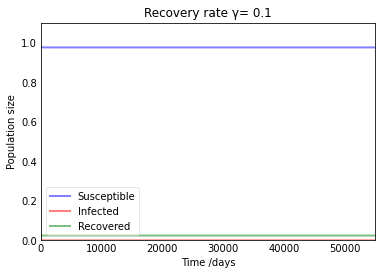

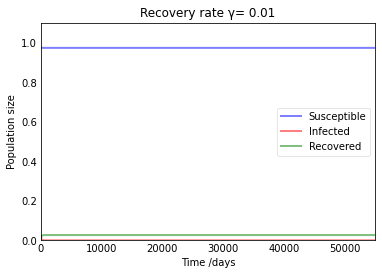

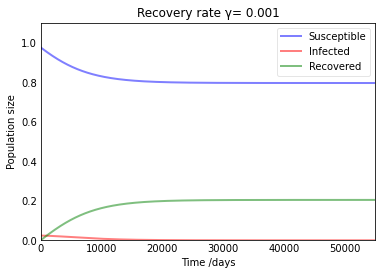

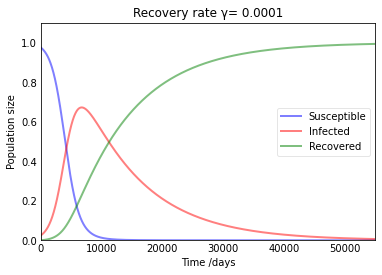

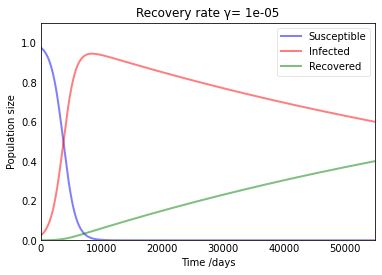

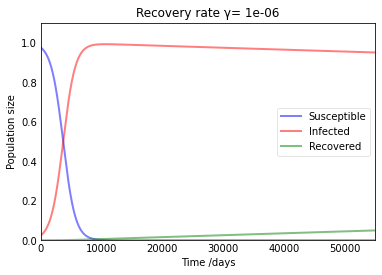

In [ ]:
def solve_SIR(g):
    I0 = 13
    R0 = 0
    S0 = 530
    N = S0 + I0 + R0 #total population, N.
    beta = 10**(-3)  #Contact rate, beta
    gamma = 10**(-g) #mean recovery rate, gamma, (in 1/days)

    t = np.linspace(0, 55000, 200000) # A grid of time points (in days)

    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    y0 = S0, I0, R0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #Integrate the SIR equations over the time grid, t.
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("Recovery rate γ= %r" %10**(-g))
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Population size')
    ax.set_ylim(0,1.1)
    ax.set_xlim(0,55000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()    
    
for i in np.linspace(1,6,num=6):
    solve_SIR(i)


## Σχολιασμός SIR

Αρχικά οι παράμετροι που θα μελετήσουμε εκφράζουν τα εξής: 
* $S(t):$ ο ευαίσθητος πληθυσμός που δεν έχει εκτεθεί στον ιό 
* $I(t):$ ο μολυσμένος πληθυσμός που φέρει και μεταδίδει τον ιό
* $R(t):$ ο πληθυσμός που εκτέθηκε και ξεπέρασε τον ιό, στην δική μας περίπτωση φαίνεται να έχει αποκτήσει ανοσία. 

Παρατηρώντας τα παραπάνω αποτελέσματα έχουμε 6 γραφικές παραστάσεις που διαφέρουν στο γ, δηλαδή στο ρυθμό ανάρρωσης που έχει κάθε μολυσμένη μονάδα του πληθυσμού. 

Αυτός είναι και ο βασικός παράγοντας που καθορίζει την πορεία μίας επιδημίας ένω το πόσα άτομα θα μολυνθούν εξαρτάται από το σύνολο του πληθυσμού. 

* Όταν έχουμε πολύ μεγάλο recovery rate (πχ γ=1) τότε δεν προλαβαίνει να μολυνθεί ο πληθυσμός άρα βλέπουμε στα διαγράμματα ευθείες γραμμές. 
* Όσο μειώνεται παρατηρούμε κάποια αύξηση στον infected πληθυσμό, ωστόσο κι αυτην αμελητέα καθώς η ανάρρωση είναι ακόμα πολύ γρήγορη. ($R0/βγ < 1$)
* Ο ρυθμός μετάδοσης είναι σταθερος για όλες τις γραφικές (β = 0.001) και παρατηρούμε πως όσο ο ρυθμός ανάρρωσης (recovery rate) είναι μεγαλύτερος από τον ρυθμό μετάδοσης (contact rate) ο συνολικός πληθυσμός θα επανέρχεται στην κανονικότητα (θα εξαφανίζεται δηλαδή ο ιός). 
* Όταν όμως το γ < 0.001, είναι μεικρότερο δηλαδή από το β, θα έχουμε δυσκολίες στην εξάλειψη του ιού. 
* Όταν το γ έχει φτάσει το 1e-05 ο ιός έχει ήδη καταφέρει να μολύνει το συνολικό πληθυσμό, ενώ όταν φτάσει το 1e-06 βλέπουμε πολύ μεγάλη δυσκολία στην αντιμετώπιση του προβλήματος. 




#### Άσκηση 2: SIS

Για το μοντέλο SIS, υιοθετείται η περίπτωση περιοδικού ρυθμού επαφής κόμβων. Κάτι τέτοιο μπορεί να αντιστοιχεί σε μια περιοδικότητα στη λήψη επιδημιών, πχ. σε ετήσια βάση όπως με τον συνιθισμένο ιό της γρίπης. Το σύνολο των διαφορικών εξισώσεων το οποίο περιγράφει αυτό το μοντέλο είναι:

$\frac{dI}{dt} = (\beta(t)N-a)I - \beta(t)I^2$

$\beta(t) = 2-1.8\cos(5t)$

Για τους συνδυασμούς παραμέτρων που φαίνονται στον ακόλουθο πίνακα, να δείξετε σε κοινό διάγραμμα την εξέλιξη του φαινομένου για κάθε συνδιασμό τιμών ($I(t),\beta(t))$

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\alpha$</td>
    <td style=text-align:center>$6$</td>
    <td style=text-align:center>$5$</td>
    <td style=text-align:center>$4$</td>
    <td style=text-align:center>$3$</td>
    <td style=text-align:center>$2$</td>
    <td style=text-align:center>$1$</td>
</tr>
<tr>
    <td style=text-align:center>$N$</td>
    <td style=text-align:center colspan='6'>$1$</td>
</tr>
</table>

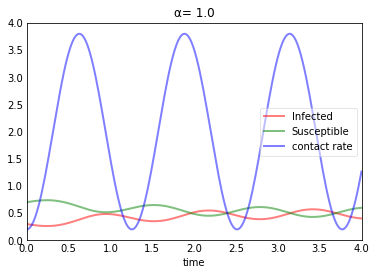

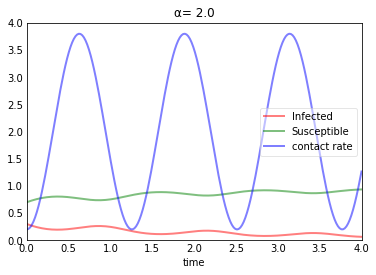

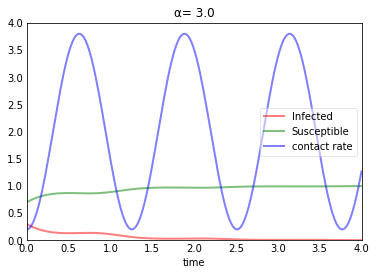

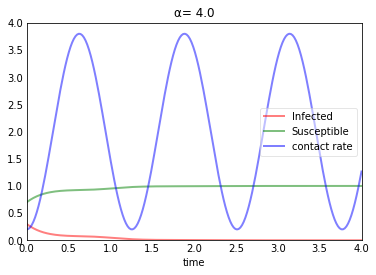

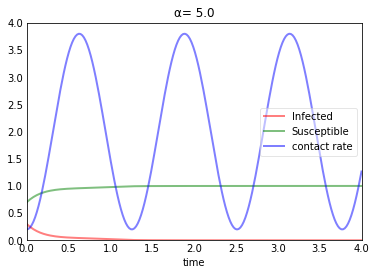

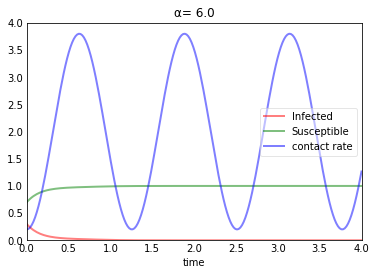

In [ ]:
def solve_SIS(g):
    I0 = 0.3
    N = 1 #population percentage
    S0 = N - I0
    alpha = g
    t = np.linspace(0, 4, 200) #time points
    
    def beta(t):
        r = 2 - 1.8*np.cos(5*t);
        return r

    # The SIS model differential equations.
    def deriv(y, t, N, alpha):
        I = y
        dIdt = (beta(t) * N-alpha) * I - beta(t) * (I**2)
        return dIdt
    
    y0 = I0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, alpha)) #Integrate the SIR equations over the time grid, t.
    I = ret
    
    def susc(N,I):
        s = N-I
        return s
    
    S = susc(N,I)
    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("α= %r" %g)
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, S, 'g', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, beta(t), 'b', alpha=0.5, lw=2, label='contact rate')
    ax.set_xlabel('time')
    ax.set_ylim(0,4)
    ax.set_xlim(0,4)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()
    
for i in np.linspace(1,6,num=6):
    solve_SIS(i)

## Σχολιασμός SIS

Αρχικά οι παράμετροι που θα μελετήσουμε εκφράζουν τα εξής: 
* $S(t):$ ο ευαίσθητος πληθυσμός που δεν έχει εκτεθεί στον ιό 
* $I(t):$ ο μολυσμένος πληθυσμός που φέρει και μεταδίδει τον ιό

Το  άθροισμα του S(t) και του I(t) αποτελεί το συνολικό πληθυσμό. 

Παρατηρώντας τα παραπάνω αποτελέσματα έχουμε 6 γραφικές παραστάσεις που διαφέρουν στο a, δηλαδή στο ρυθμό ανάρρωση που έχει κάθε μολυσμένη μονάδα του πληθυσμού (αυτός αυξάνεται από 1 εώς 6).

Επίσης λόγω της φύσης του συστήματος θα παρατηρήσουμε μία περιοδικότητα στο β (contact rate), αυτό συμβαίνει επειδή ο πληθυσμός ποτέ δεν εμφανίζει ανοσία στον συγκεκριμένο ιό και ανάλογα με το contact rate θα έχουμε αυξομειώσεις στην μετάδοση του. 

#### Παρατηρήσεις: 
* Όταν το a=1 θα δούμε αυτήν την περιοδική συμπεριφορά των Infected - Susceptible να έχει πολύ έντονες αυξομειώσεις, σταθεροποιούνται με το πέρασμα του χρόνου (time).
* Όσο το a αυξάνεται χάνεται αυτήν η περιοδικότητα. 
* Για a>3 παρατηρούνται απλά δυο καμπύλες (η "infected" φθίνουσα, η "susceptible" αυξουσα) μέχρι να φτάσουν κάποιο peak και μετά συνεχίζουν ευθεία. 
* Αυτό το μέγιστο- ελάχιστο το φθάνουν λίγο πριν το contact rate να φτάσει για πρώτη φορά την μέγιστη τιμή του. 
